<a href="https://colab.research.google.com/github/Rajarshi1919/Data_Mining-Project/blob/main/Data_Mining_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [150]:
#Importing the files package into google colab
from google.colab import files 
import io

In [151]:
#uploading the file from system to data variable
data=files.upload()

Saving Anderlecht_30_2021.csv to Anderlecht_30_2021 (2).csv


In [152]:
#Reading the CSV file into dataframe
df=pd.read_csv(io.StringIO(data['Anderlecht_30_2021.csv'].decode('utf-8')))

In [154]:

pip install pmdarima #Installing pmdarima package


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [155]:
import pandas as pd #importing pandas package to work on dataframes
import matplotlib.pyplot as plt #importing matplotlib package for plotting
from datetime import datetime #importing datetime package as the set is timeseries
from statsmodels.tsa.arima.model import ARIMA #importing ARIMA package 



In [156]:
df.head()#To understand the dataset,dispalying top five rows

,Time_Stamp,Street Segment Index,Traffic Flow,Average Speed
0,07-04-2021 08:00,1285.0,8,80.125000
1,30-03-2021 22:30,1222.0,4,88.000000
2,31-03-2021 09:00,1222.0,17,84.764706
3,02-04-2021 13:00,2818.0,16,77.062500
4,18-03-2021 07:30,2253.0,1,27.000000


In [157]:
#As the dataset needs to be a timeseries data,changing the Time_Stamp attribute as index 
df=df.set_index('Time_Stamp') 


In [160]:
#Dropping the unnecessary columns
df=df.drop(['Street Segment Index','Traffic Flow'],axis=1) 


In [161]:
#Verifying if the dataset is Timeseries or not? As the index became timestamp,we can say that the dataset is timeseries data
df.head()

,Average Speed
Time_Stamp,
07-04-2021 08:00,80.125000
30-03-2021 22:30,88.000000
31-03-2021 09:00,84.764706
02-04-2021 13:00,77.062500
18-03-2021 07:30,27.000000


In [162]:
df['Average Speed']

Time_Stamp
07-04-2021 08:00    80.125000
30-03-2021 22:30    88.000000
31-03-2021 09:00    84.764706
02-04-2021 13:00    77.062500
18-03-2021 07:30    27.000000
                      ...    
25-03-2021 09:30    31.000000
14-04-2021 09:30     0.000000
01-04-2021 03:30    50.000000
17-03-2021 10:00    17.000000
25-03-2021 09:00     1.000000
Name: Average Speed, Length: 150823, dtype: float64

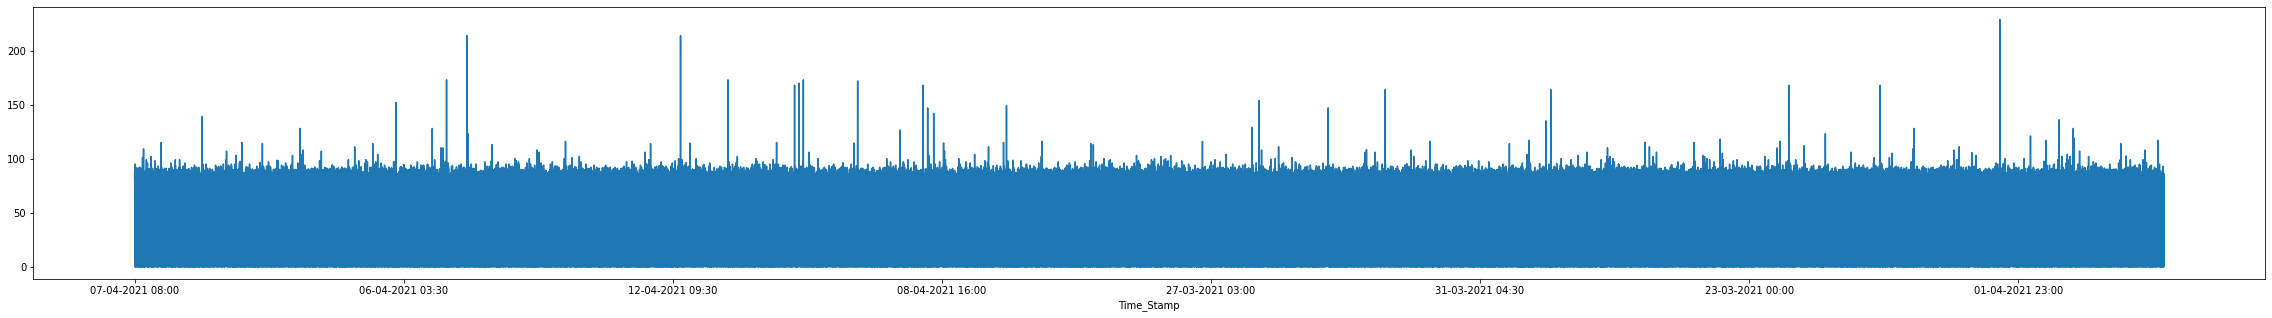

In [164]:
#Plotting the graph between Time_Stamp Vs Average Speed	to understand the impact of outliers. Since there are less outliers compared to the whole data,ignoring the suppression of outliers.
plt.figure(figsize=(40,5))
df['Average Speed'].plot()

In [165]:
#DATA PREPROCESSING
#Checking if the data has any null values
print(df.isnull().sum())


Average Speed    0
dtype: int64


In [173]:
#To calculate the size of datset
len(df['Average Speed'])

150823

In [174]:
from statsmodels.tsa.stattools import adfuller #importing adfuller package to check the stationary of the data
#from pandas.tseries.offsets import *


In [175]:
dftest=adfuller(df['Average Speed'],autolag='AIC')

In [176]:
#checking if the data is stationary
if(dftest[1]==0):
  print("The dataset contains stationaty data")
else:
  print("The dataset conatins non-stationary data.It must be converted")  
     

The dataset contains stationaty data


In [177]:
from pmdarima import auto_arima #From pmdarima pacakage importing auto-arima to calculate best model automatically
#import warnings
#warnings.filterwarnings("ignore")

In [178]:
#Saving all the dataset in one variable
X=df['Average Speed']

In [179]:
#CALCULATING THE BEST MODEL TO TRAIN THE DATSET BASED ON AIC CRITERIA
stepwise_fit=auto_arima(X,trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=inf, Time=199.85 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=1416932.802, Time=30.12 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=1416593.832, Time=35.47 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=1416623.135, Time=45.99 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=1557639.126, Time=28.64 sec
 ARIMA(2,0,0)(0,0,0)[0] intercept   : AIC=1416252.179, Time=35.09 sec
 ARIMA(3,0,0)(0,0,0)[0] intercept   : AIC=1416005.165, Time=40.91 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=1415798.794, Time=42.19 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=1415590.280, Time=49.14 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=1415590.845, Time=80.46 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=1415799.364, Time=59.72 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=1434718.724, Time=35.30 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0] intercept
Total fit time: 682.934 seconds


In [180]:
#Importing train_test_split method to split the dataset into training set and testing set
from sklearn.model_selection import train_test_split

In [181]:
#Splitting 70% of the data as training set and remaining 30% of the data as testing set and inorder to remain the same dataset,mentioned random_state=None
X_train, X_test= train_test_split(X,test_size=0.3, random_state=None)

In [187]:
#Checking size of training and testing set
print("Size of the training set is:",X_train.size)
print("Size of the testing set is:",X_test.size)

Size of the training set is: 105576
Size of the testing set is: 45247


In [188]:
#Building and fitting ARIMA model
ARIMA_model = ARIMA(X, order=(5,0,0))
model_fit = ARIMA_model.fit()

In [189]:
#Predictions of Testing set
ARIMA_predict=model_fit.predict(start=X_train.size,end=X_train.size+X_test.size-1,typ='levels')

In [190]:
#Printing the predict values of the testing set
print(ARIMA_predict)

Time_Stamp
13-04-2021 06:00    35.012935
01-04-2021 04:00    34.074443
13-04-2021 19:30    35.899283
24-03-2021 13:30    35.412403
23-03-2021 11:00    36.865131
                      ...    
25-03-2021 09:30    37.872240
14-04-2021 09:30    35.911062
01-04-2021 03:30    34.196069
17-03-2021 10:00    33.864057
25-03-2021 09:00    33.637920
Name: predicted_mean, Length: 45247, dtype: float64


In [198]:
#PERFORMCE METRICS[MEAN SQUARED ERROR and MEAN ABSOLUTE ERROR]
#Calculating Root mean squared error and sqrt method by importing them from skelarn.metrics and math packages
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE=sqrt(mean_squared_error(X_test, ARIMA_predict))#calculating Root mean squared error
print(RMSE)#Printing Root mean squared error

26.640794228667332


In [199]:
from sklearn.metrics import mean_absolute_error #importing mean_absolute_error method from sklearn.metrics package
MAE=mean_absolute_error(X_test, ARIMA_predict)#calculating Mean absolute error
print(MAE)#Printing Mean Absolute Error Value

21.259250658442394


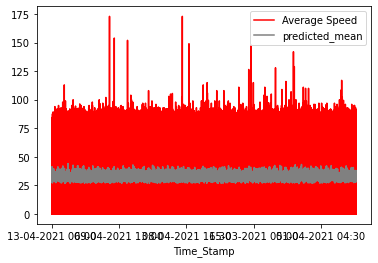

In [201]:
#plotting T
X_test.plot(legend=True,color='red')
ARIMA_predict.plot(legend=True,color='gray')
